In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from fleck import generate_spots, Stars

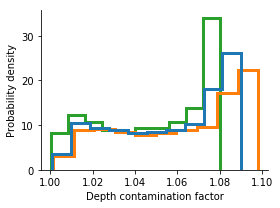

In [34]:
n_incs = 10000
n_spots = 3

fig, ax = plt.subplots(figsize=(4,3))

min_lat = [58, 57, 68]
spot_contrast = [0.62, 0.59, 0.66]
spot_radii = [0.24, 0.30, 0.14]

for i in range(3): 
    inc_stellar = (180*np.random.rand(n_incs) - 90) * u.deg
    spot_radii = spot_radii[i] * np.ones((n_spots, n_incs))
    spot_lats = ((90-min_lat[i])*np.random.rand(n_spots, n_incs) + min_lat[i]) * u.deg
    spot_lons = 360*np.random.rand(n_spots, n_incs) * u.deg

    n_phases = 30
    u_ld = [0.5079, 0.2239]

    stars = Stars(spot_contrast[i], n_phases, u_ld)
    lcs = stars.light_curves(spot_lons, spot_lats, spot_radii, inc_stellar)

    b = 0 
    rprs = 0.1

    x = 1 - np.sqrt(1 - b**2)
    lam_max = rprs**2 * ( 1 - u_ld[0] * x - u_ld[1] * x**2) / (1 - u_ld[0]/3 - u_ld[1]/6)

    depth_observed = lam_max / lcs
    fs = 15

    ticks = np.arange(0, 2*np.pi, 0.5*np.pi)

    max_depths = np.max(depth_observed, axis=0)
    ax.hist(max_depths / lam_max, density=True, histtype='step', lw=3, zorder=-i)
ax.set(xlabel='Depth contamination factor', ylabel='Probability density')
for s in 'right top'.split():
    ax.spines[s].set_visible(False)
fig.tight_layout()
fig.savefig('plots/depths.pdf', bbox_inches='tight')
plt.show()

In [29]:
np.sqrt(1.1*rprs**2) / rprs

1.0488088481701516

In [30]:
0.2/3.70

0.05405405405405406